In [16]:
import numpy as np
import os
import random
from collections import defaultdict
from enum import Enum
from typing import Tuple, List, overload

import torch
from torch.utils.data import Dataset, Subset, random_split, WeightedRandomSampler, DataLoader
from torchvision import transforms
from torchvision.transforms import *
import colorsys

import matplotlib.pyplot as plt

import PIL
from PIL import Image
from dataset import Age11Dataset, CustomAugmentation


In [17]:
data_dir = "/opt/ml/input/data/train/images"
data = Age11Dataset(data_dir = data_dir)
data.get_sampler("train")
data.set_transform(CustomAugmentation(resize = (300,300), mean=(0.548, 0.504, 0.479), std=(0.237, 0.247, 0.246)))

train, val = data.split_dataset()

In [21]:
#Loader 정의 train sampler 
train_loader = DataLoader(
    train,
    64, # batch size
    num_workers=0,
    shuffle=False,
    drop_last=True,
    sampler = data.get_sampler("train") # WeightedRandomSampler
    )

#Loader 정의 val sampler 
val_loader = DataLoader(
    val,
    64, # batch size
    num_workers=0,
    shuffle=False,
    drop_last=True,
    sampler = data.get_sampler("val") # WeightedRandomSampler
    )

In [22]:
train_image, train_labels =next(iter(train_loader))
val_image, val_labels = next(iter(val_loader))


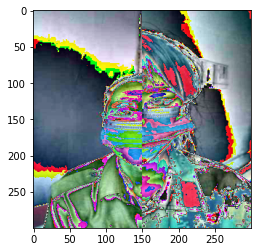

In [24]:
im = train_image[5]
im = ToPILImage()(im)
plt.imshow(im)

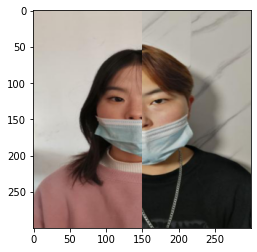

In [24]:
im2 = val_image[5]
im2 = ToPILImage()(im2)
plt.imshow(im2)

torch.Size([64, 3, 224, 224])
0 224 112 224


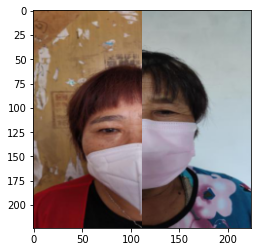

In [12]:
bbx1, bby1, bbx2, bby2 = rand_bbox(image.size(), 0.5)
print(bbx1,bbx2,bby1,bby2)
im[:, bbx1:bbx2, bby1:bby2] = im2[:, bbx1:bbx2,bby1:bby2]
_image = ToPILImage()(im)
plt.imshow(_image)

In [10]:
print(a)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [22]:
_,_,age = data.decode_multi_class(9)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 448,
 449,
 450,
 451,
 